In [9]:
import numpy as np

In [14]:
course_planner = {2024:{"semester 1": ["COMP20001", "COMP30003", "COMP20003", ""], "semester 2": ["COMP10001", "ECOM20001", "COMP10003", ""]}, 2025:{"semester 1": ["","","",""], "semester 2": ["", '','','']}}
prereqs = {"COMP20001": "COMP10001", "COMP20003": "COMP10003", "COMP30003": "COMP20001", "COMP10003": "COMP10001"}
available_sem = {"COMP20001": ["semester 2"], "COMP10001": ["semester 1"], "ECOM20001": ["semester 1"]}
all_subjects = set(subject for sem in course_planner.values() for subjects in sem.values() for subject in subjects)
subject_to_int = {subject: idx for idx, subject in enumerate(all_subjects)}
int_to_subject = {idx: subject for subject, idx in subject_to_int.items()}


In [11]:
initial_population = []
for sems in course_planner.values():
    initial_population.append(list(sems.values()))

for i in range(len(initial_population)):
    for j in range(len(initial_population[i])):
        for k in range(len(initial_population[i][j])):
            initial_population[i][j][k] = subject_to_int[initial_population[i][j][k]]

In [28]:
def before(a, b):
    # check if subject a is taken before class b
    for year in course_planner.values():
        for subjects in year.values():
            if b in subjects:
                return False
            elif a in subjects:
                return True


def array_to_course_planner(X):
    X = [int_to_subject[idx] for idx in X]
    for year_num, year in course_planner.items():
        for sem, subjects in year.items():
            course_planner[year_num][sem] = X[:len(subjects)]
            X = X[len(subjects):]
                

        

def unavailable_sem():
    count = 0
    for year in course_planner.values():
        for sem, subjects in year.items():
            for subject in subjects:
                if subject in available_sem and sem not in available_sem[subject]:
                    count += 100
    return count


def f(ga, X, X_idx):    
    array_to_course_planner(X)
    fitness = 0
    fitness -= unavailable_sem()
    for subject, prereq in prereqs.items():
        if not before(prereq, subject):
            fitness -= 1
    
    return fitness


def on_gen(ga_instance):
    #print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])



c:\Users\tonyt\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


[array([2., 3., 4., 0.]), array([6., 5., 1., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.])]
Fitness of the best solution : -304
[array([2., 3., 4., 0.]), array([6., 0., 1., 0.]), array([0., 0., 0., 0.]), array([0., 0., 5., 0.])]
Fitness of the best solution : -304
[array([2., 6., 4., 0.]), array([3., 0., 1., 0.]), array([0., 0., 0., 0.]), array([0., 0., 5., 0.])]
Fitness of the best solution : -202
[array([2., 6., 0., 0.]), array([3., 0., 1., 0.]), array([0., 0., 4., 0.]), array([0., 0., 5., 0.])]
Fitness of the best solution : -201
[array([2., 6., 0., 0.]), array([3., 0., 1., 0.]), array([0., 0., 4., 0.]), array([0., 0., 5., 0.])]
Fitness of the best solution : -201
[array([2., 6., 5., 0.]), array([3., 0., 1., 0.]), array([0., 0., 4., 0.]), array([0., 0., 0., 0.])]
Fitness of the best solution : -101
[array([2., 6., 5., 0.]), array([4., 0., 1., 0.]), array([0., 0., 3., 0.]), array([0., 0., 0., 0.])]
Fitness of the best solution : -101
[array([2., 6., 5., 0.]), array([3., 0., 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[array([0., 5., 0., 0.]), array([2., 0., 0., 0.]), array([0., 1., 0., 6.]), array([0., 3., 0., 4.])]
Fitness of the best solution : 0
[array([0., 6., 0., 0.]), array([5., 0., 0., 0.]), array([0., 1., 0., 2.]), array([0., 3., 0., 4.])]
Fitness of the best solution : 0
[array([0., 6., 0., 0.]), array([2., 0., 0., 0.]), array([0., 0., 0., 5.]), array([0., 3., 1., 4.])]
Fitness of the best solution : 0
[array([0., 0., 0., 0.]), array([2., 0., 0., 0.]), array([0., 1., 0., 5.]), array([6., 3., 0., 4.])]
Fitness of the best solution : 0
[array([0., 5., 0., 0.]), array([2., 0., 0., 0.]), array([0., 1., 0., 6.]), array([0., 3., 0., 4.])]
Fitness of the best solution : 0
[array([0., 6., 0., 0.]), array([2., 0., 0., 0.]), array([0., 0., 0., 5.]), array([1., 3., 0., 4.])]
Fitness of the best solution : 0
[array([0., 6., 0., 0.]), array([2., 0., 0., 0.]), array([0., 4., 0., 5.]), array([0., 3., 0., 1.])]
Fitness of the best solution : 0
[array([0., 6., 0., 0.]), array([2., 1., 0., 0.]), array([0., 

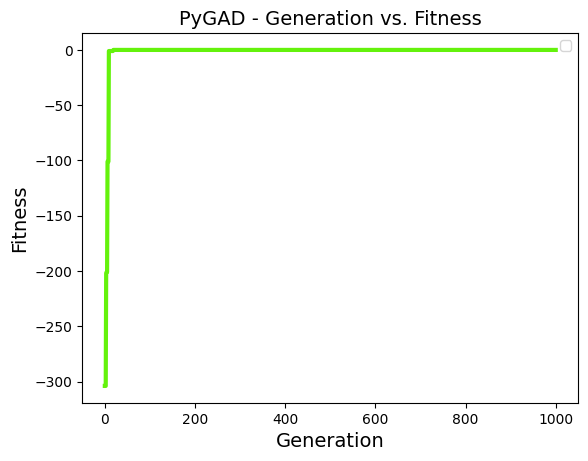

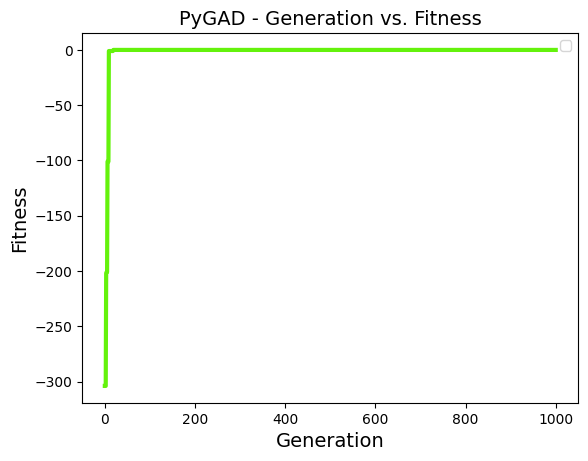

In [60]:
import pygad
import random
def mutation_func(offspring, ga_instance):
    offspring = offspring.flatten()
    semesters = []
    for year in course_planner.values():
        for subjects in year.values():
            semesters.append(offspring[:len(subjects)])
            offspring = offspring[len(subjects):]
    
    # Select two different subarrays/groups
    group1_idx, group2_idx = random.sample(range(len(semesters)), 2)

    # Select random elements from each group
    elem1_idx = random.randint(0, len(semesters[group1_idx]) - 1)
    elem2_idx = random.randint(0, len(semesters[group2_idx]) - 1)

    # Swap the elements between the groups
    semesters[group1_idx][elem1_idx], semesters[group2_idx][elem2_idx] = (
        semesters[group2_idx][elem2_idx],
        semesters[group1_idx][elem1_idx],
    )
    print(semesters)
    return np.array(semesters).reshape(1, -1)

initial_population = np.array(initial_population).flatten()
model = pygad.GA(initial_population = [initial_population, initial_population],
                fitness_func = f,
                num_generations = 1000,
                num_parents_mating = 1, 
                crossover_probability = 0,
                mutation_probability = 1,
                on_generation=on_gen,
                mutation_type = mutation_func)


model.run()  
print("\nbest solution:", array_to_course_planner(model.best_solution()[0]))
print("fitness:", model.best_solution()[1])
model.plot_fitness() 

In [61]:
print(course_planner)

{2024: {'semester 1': ['COMP30003', 'COMP10001', '', ''], 'semester 2': ['COMP20001', 'COMP10003', '', '']}, 2025: {'semester 1': ['ECOM20001', '', '', ''], 'semester 2': ['', '', 'COMP20003', '']}}


In [62]:
fitness = 0
fitness -= unavailable_sem()
for subject, prereq in prereqs.items():
    if not before(prereq, subject):
        fitness -= 1
print(fitness)

-1
